In [3]:
pokemon<-read.csv("../data/pokemon.csv",sep=",",stringsAsFactors=F, header = TRUE)
combats<-read.csv("../data/combats.csv",sep=",",stringsAsFactors=F, header = TRUE)
source("../functions/separ2.R")
source("../functions/prob.log.R")
source("../functions/logistic.R")
source("../functions/separ1.R")
source("../functions/prob.log2.R")
library("MASS")
pokemon$Legendary <- as.numeric(as.logical(pokemon$Legendary)) + 1

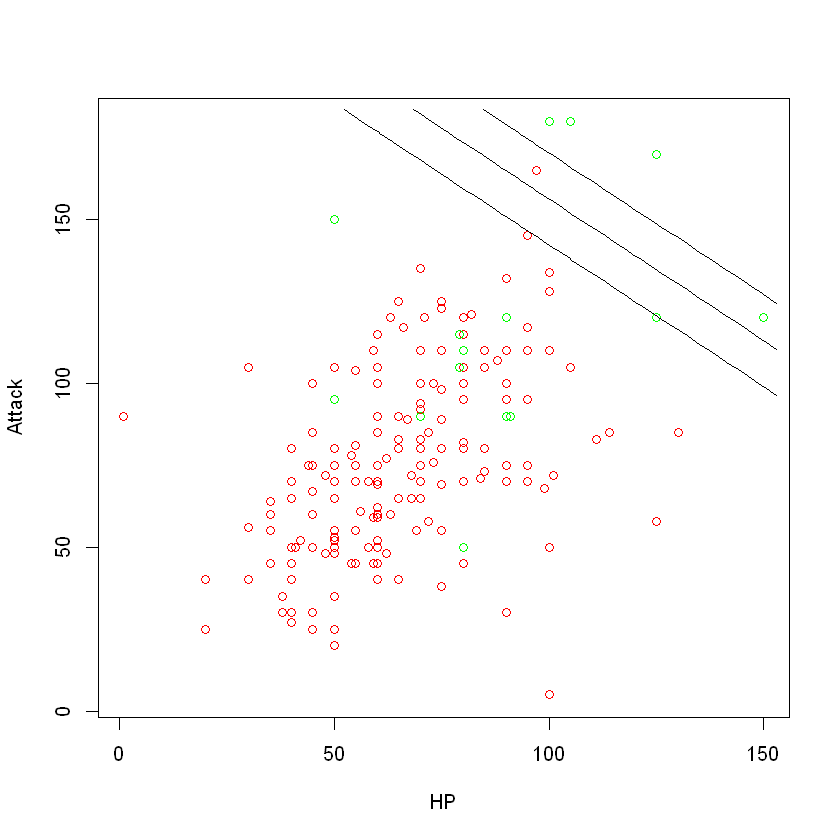

In [13]:
pokemon.num<-pokemon[c(5,6,7,8,9)]

out0<-separ2(pokemon.num[,c(1,2)],pokemon$Legendary)
Xapp<-out0$Xapp
zapp<-out0$zapp
Xval<-out0$Xval
zval<-out0$zval
Xtst<- out0$Xtst
ztst<-out0$ztst

out<-log.app(Xapp,zapp,T,1e-5)

prob.log(out$beta,Xtst,ztst, niveaux = c(0.4,0.5,0.6))



In [12]:
X<- poly(as.matrix(pokemon.num[,c(4,5)]), degree=2, raw=T)
out0<-separ1(X,pokemon$Legendary)
Xapp<-out0$Xapp
zapp<-out0$zapp
Xval<-out0$Xval
zval<-out0$zval
Xtst<- out0$Xtst
ztst<-out0$ztst
out<-log.app(Xapp,as.factor(zapp),T,1e-5)
prob.log2(out$beta,Xtst[,c(1,3)],ztst, niveaux = c(0.4,0.5,0.6))

pokemon

ERROR: Error in as.matrix(pokemon.num[, c(4, 5)]): objet 'pokemon.num' introuvable


In [11]:
score <- function(pok1, pok2, data) #proba à posteriori à la classe 1
{

    pk1<-data[pok1,c(3,4,5,6,7,8,9,10,12)]
       pk2<-data[pok2,c(3,4,5,6,7,8,9,10,12)]
    
    
    out$tab <-rbind(pk1,pk2)
    out$score<-sum(pk1[c(3,4,5,6,7)])-sum(pk2[c(3,4,5,6,7)])
    out
}



In [38]:
num_combat=174
res<-score(combats[num_combat,1],combats[num_combat,2],pokemon)
res$tab
if(res$score<0)
    print("Pokemon2")
if(res$score>0)
    print("Pokemon1")
combats[num_combat,3]

,Type.1,Type.2,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Legendary
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
161,Dragon,,61,84,65,70,70,70,1
781,Ghost,Grass,49,66,70,44,55,51,1


[1] "Pokemon1"


[1] 161

In [49]:
resultat<-c()
for (num_combat in 1:length(combats$First_pokemon))
{
    res<-score(combats[num_combat,1],combats[num_combat,2],pokemon)

if(res$score<=0)
    resultat[num_combat]<-combats[num_combat,2]
if(res$score>0)
     resultat[num_combat]<-combats[num_combat,1]
}


In [16]:
length(resultat[resultat == combats[,3]])/50000


[1] 0.78546

In [9]:
score2 <- function(pok1, pok2, data) #Avec l'attaque et la vitesse
{

    pk1<-data[pok1,c(3,4,5,6,7,8,9,10,12)]
       pk2<-data[pok2,c(3,4,5,6,7,8,9,10,12)]
    
    
    out$tab <-rbind(pk1,pk2)
    out$score<-sum(pk1[c(4,8)])-sum(pk2[c(4,8)])
    out
}



In [14]:
resultat<-c()
for (num_combat in 1:length(combats$First_pokemon))
{
    res<-score2(combats[num_combat,1],combats[num_combat,2],pokemon)

if(res$score<=0)
    resultat[num_combat]<-combats[num_combat,2]
if(res$score>0)
     resultat[num_combat]<-combats[num_combat,1]
}

In [15]:
length(resultat[resultat == combats[,3]])/50000

[1] 0.78546